In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
rcParams["figure.figsize"] = 15, 5
sns.set_style("darkgrid")


In [19]:
customerData = pd.read_csv("customers.csv")
customerData.drop(["CustomerID"], axis = 1, inplace = True)
customerData.head()


,Genre,Age,Annual_Income_(k$),Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [20]:
customerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Genre               200 non-null    object
 1   Age                 200 non-null    int64 
 2   Annual_Income_(k$)  200 non-null    int64 
 3   Spending_Score      200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [21]:
customerData.describe()

,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


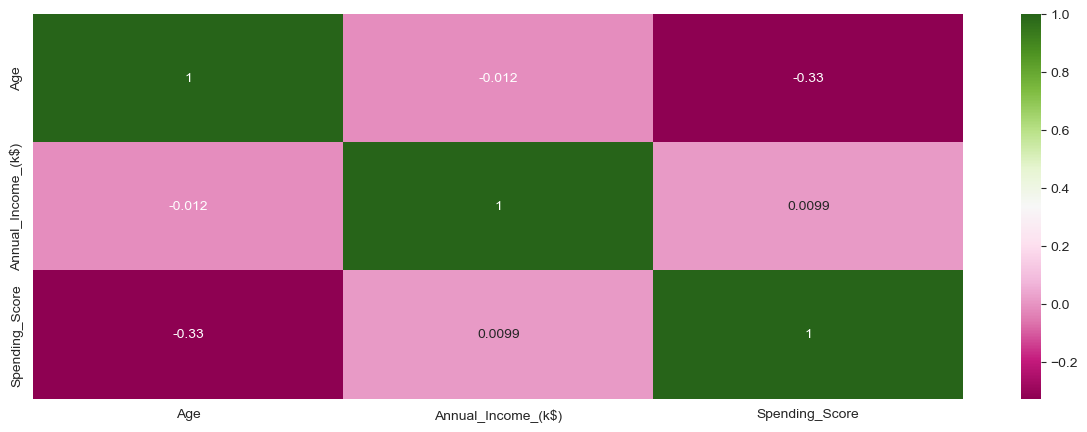

In [22]:
sns.heatmap(customerData.corr(), annot = True, cmap = "PiYG")
plt.show()

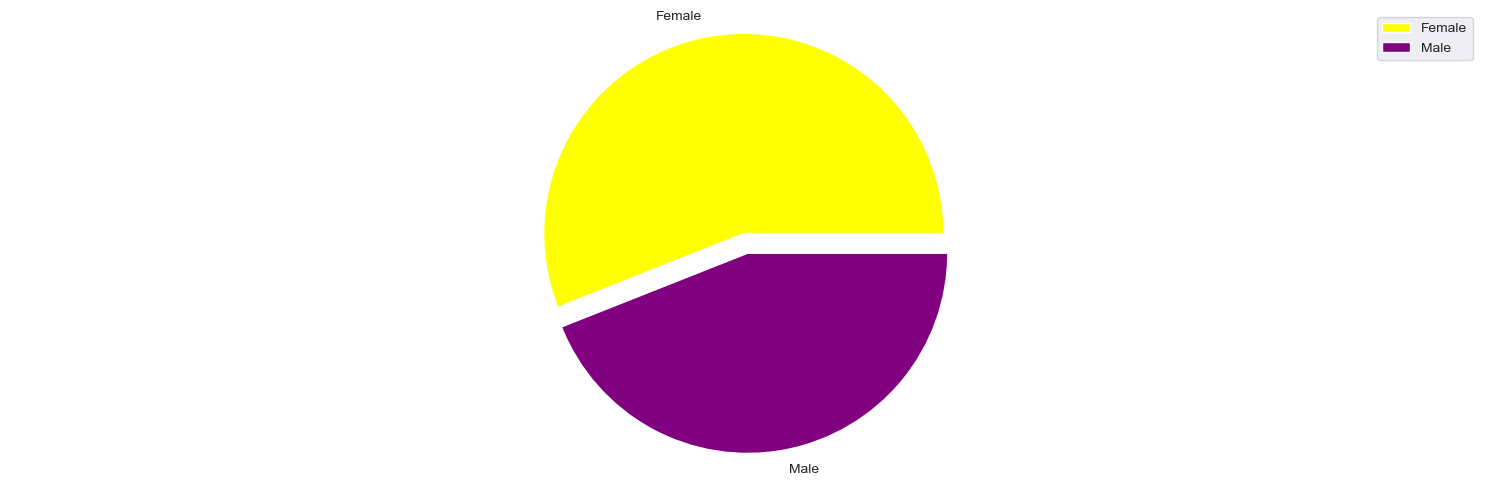

In [23]:
plt.pie(customerData["Genre"].value_counts(), labels = ["Female", "Male"], colors = ["Yellow", "Purple"], explode = [0,0.1])
plt.legend()
plt.tight_layout()
plt.axis("equal")
plt.show()

In [24]:
x = customerData.iloc[:, [2, 3]].values

In [25]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps = 3, min_samples= 4, metric="euclidean")
db.fit(x)

DBSCAN(eps=3, min_samples=4)

In [26]:
db.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0,  0,  0,  0, -1, -1,  0, -1,  0, -1,  0,  0,
       -1,  0, -1, -1,  0, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  2,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  2,
        3,  3, -1,  3, -1, -1,  4, -1, -1, -1,  4,  5,  4, -1,  4,  5, -1,
        5,  4, -1,  4,  5, -1, -1,  6, -1, -1, -1,  7, -1,  6, -1,  6, -1,
        7, -1,  6, -1,  7, -1,  7, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        8, -1,  8, -1,  8, -1,  8, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

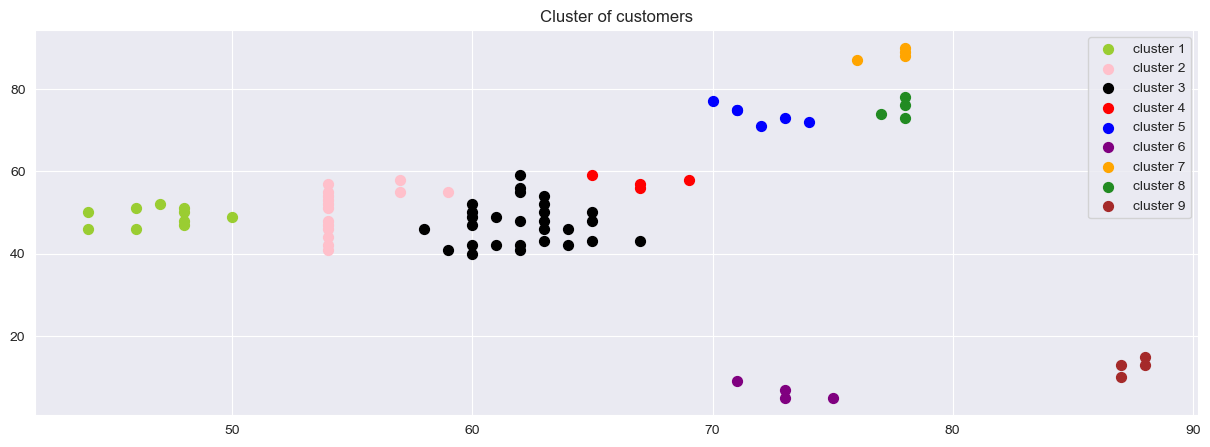

In [27]:
y_pred = db.fit_predict(x)
plt.scatter(x[y_pred == 0,0], x[y_pred == 0,1], s = 50, c = "yellowgreen", label = "cluster 1")
plt.scatter(x[y_pred == 1,0], x[y_pred == 1,1], s = 50, c = "pink", label = "cluster 2")
plt.scatter(x[y_pred == 2,0], x[y_pred == 2,1], s = 50, c = "black", label = "cluster 3")
plt.scatter(x[y_pred == 3,0], x[y_pred == 3,1], s = 50, c = "red", label = "cluster 4")
plt.scatter(x[y_pred == 4,0], x[y_pred == 4,1], s = 50, c = "blue", label = "cluster 5")
plt.scatter(x[y_pred == 5,0], x[y_pred == 5,1], s = 50, c = "purple", label = "cluster 6")
plt.scatter(x[y_pred == 6,0], x[y_pred == 6,1], s = 50, c = "orange", label = "cluster 7")
plt.scatter(x[y_pred == 7,0], x[y_pred == 7,1], s = 50, c = "forestgreen", label = "cluster 8")
plt.scatter(x[y_pred == 8,0], x[y_pred == 8,1], s = 50, c = "brown", label = "cluster 9")

plt.title("Cluster of customers")
plt.xlabel = ("Annual INcome")
plt.ylabel = ("Spending Score")
plt.legend()
plt.show()

In [28]:
#using different dataset
test = pd.read_csv("Pokemon.csv")
test.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [29]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [30]:
test.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


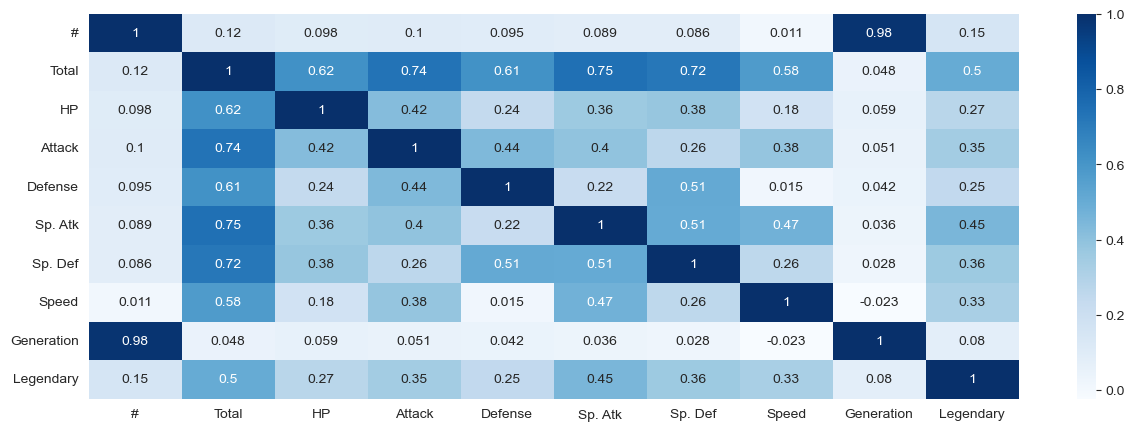

In [31]:
sns.heatmap(test.corr(), annot = True, cmap = "Blues")
plt.show()

In [32]:
x = test.iloc[:,[4,11]].values
db_test = DBSCAN(eps = 3, min_samples= 4, metric="euclidean")
db_test.fit(x)


DBSCAN(eps=3, min_samples=4)

In [33]:
db_test.labels_

array([ 0,  1,  2, -1,  0,  1,  3, -1, -1,  0,  1,  3,  4, 33,  5,  6, 33,
        5,  6,  7,  8, 16,  9, 10,  8, 11, 12, 13, 14, 13,  0,  9,  0, 15,
       36, 16, 17, 12, 16, 17,  0,  9,  0, 17, 12, 13, 28, 15,  0,  6,  9,
       14,  1,  0, 15, 12,  1, 14, 13,  0,  7,  0, 15, 16, -1,  0, 18, 17,
        0, 19,  7, 20,  0,  1, 17,  0, 21,  9, 31,  2,  0, 21,  7, 11,  7,
        0,  9, 20,  0, 15, 16,  0, 15,  0, 15,  0,  7,  0,  2,  0,  1,  7,
       22, 18,  0,  9,  0, 15,  0,  9,  0,  2,  0, 30, 15, 15, 18, 23,  9,
       16,  9, 15, 13,  9, 20, 14, 13,  0, 15, 23,  2, 15,  7, 15,  9,  7,
        7, 22,  9, 33, 24, -1,  3, 14,  0,  2,  2,  2,  6, 16,  7, 16,  7,
        2, -1, 24, 10, 10, 10,  0, 25, 22, 26, -1, -1, 22,  0,  1,  2,  0,
        1,  3,  0,  1,  3, 27, 11, 12, 13, 12, 21,  8, 21,  3,  0, 15,  5,
       27, -1, 28,  1,  0, 15, 29, 16, 17, -1,  9,  8, 25, 11,  7,  8, 23,
       15, 16, -1, 30, 21, -1, 30,  2,  2,  1,  9, 13, 31,  1, 15, 14, 15,
       11, 30, 17, -1,  0

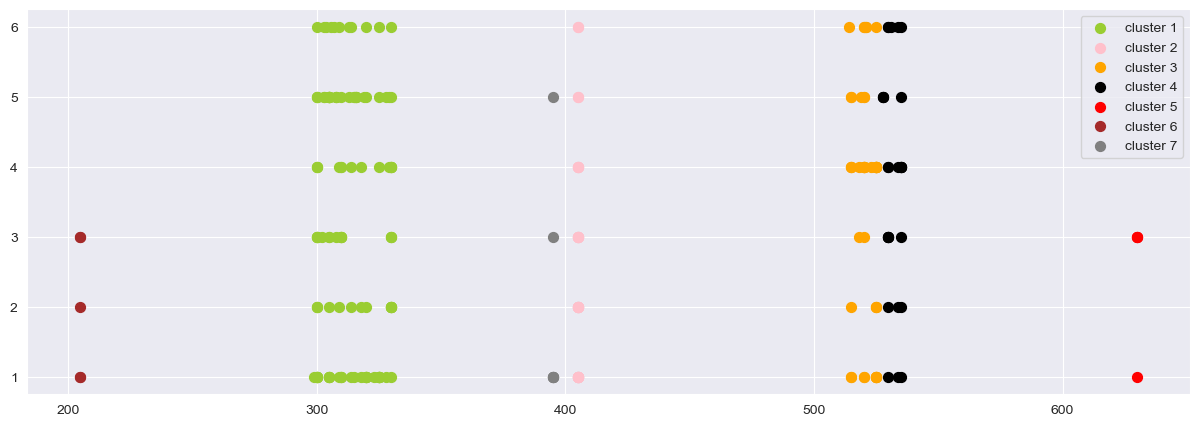

In [34]:
y_pred = db.fit_predict(x)
plt.scatter(x[y_pred == 0,0], x[y_pred == 0,1], s = 50, c = "yellowgreen", label = "cluster 1")
plt.scatter(x[y_pred == 1,0], x[y_pred == 1,1], s = 50, c = "pink", label = "cluster 2")
plt.scatter(x[y_pred == 2,0], x[y_pred == 2,1], s = 50, c = "orange", label = "cluster 3")
plt.scatter(x[y_pred == 3,0], x[y_pred == 3,1], s = 50, c = "black", label = "cluster 4")
plt.scatter(x[y_pred == 4,0], x[y_pred == 4,1], s = 50, c = "red", label = "cluster 5")
plt.scatter(x[y_pred == 5,0], x[y_pred == 5,1], s = 50, c = "brown", label = "cluster 6")
plt.scatter(x[y_pred == 6,0], x[y_pred == 6,1], s = 50, c = "grey", label = "cluster 7")

plt.legend()
plt.show()